In [156]:
# Importing required packages
import numpy as np
import pandas as pd

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### IMPORTING DATA 

In [157]:
original_data = pd.DataFrame(pd.read_csv(r'C:\Users\Raghavi PK\Desktop\PGDDS\machine learning\Lead Scoring Assignment\Leads.csv'))
original_data.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Checking for duplicates

In [158]:
sum(original_data.duplicated(subset = 'Prospect ID')) == 0

True

In [159]:
#No duplicates found

### Data Cleaning

There are several fields which has 'Select' in it. That is basically because the visitors hasn't selected any options from the drop down.
Hence we are replacing Select with null (NaN)

In [160]:
original_data = original_data.replace('Select', np.nan)
original_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [161]:
# Percentage of null values present in each column
round(100*(original_data.isnull().sum()/len(original_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [162]:
#Dropping columns with more than 70 % NaN values
original_data = original_data.drop(original_data.loc[:,list(round(100*(original_data.isnull().sum()/len(original_data.index)), 2)>70)].columns, 1)

In [163]:
original_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,No,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,No,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


Let's look into the higher % of NaN columns in order to reduce the % of null values

In [164]:
# Lead Quality
original_data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

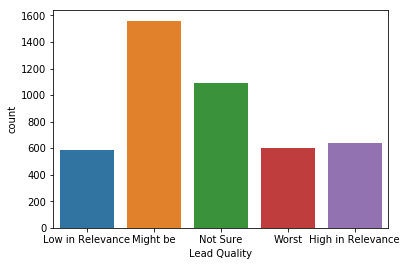

In [165]:
sns.countplot(original_data['Lead Quality'])

As Lead quality is based on visitor's intuition, NaN can be replaced with Not Sure

In [166]:
original_data['Lead Quality'] = original_data['Lead Quality'].replace(np.nan, 'Not Sure')

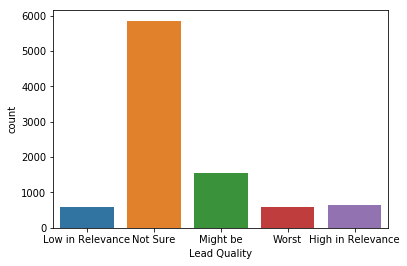

In [167]:
sns.countplot(original_data['Lead Quality'])

In [168]:
# Asymmetrique Activity Index  
# Asymmetrique Profile Index   
# Asymmetrique Activity Score  
# Asymmetrique Profile Score   

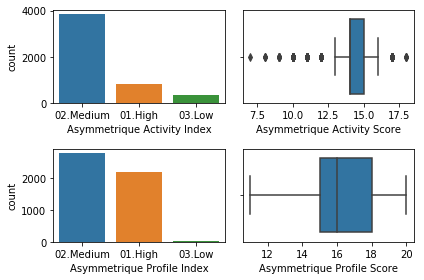

In [169]:
fig, axs = plt.subplots(2,2)
plt1 = sns.countplot(original_data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(original_data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(original_data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(original_data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [170]:

data = original_data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [171]:

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [172]:
# fig, axs = plt.subplots(2,2)
# plt1 = sns.countplot(original_data['City'], ax = axs[0,0])
# plt2 = sns.countplot(original_data['What is your current occupation'], ax = axs[0,1])
# plt3 = sns.countplot(original_data['Specialization'], ax = axs[1,0])
# plt4 = sns.countplot(original_data['Tags'], ax = axs[1,1])
# plt.xticks(rotation = 90)
# plt.tight_layout()

In [173]:
# print(data['TotalVisits'].value_counts())
# print(data['Total Time Spent on Website'].value_counts())
# data['Page Views Per Visit'].value_counts()
print(data['Country'].value_counts())
print(data['City'].value_counts())
print(data['Tags'].value_counts())
print(data['Specialization'].value_counts())
print(data['What is your current occupation'].value_counts())
print(data['What matters most to you in choosing a course'].value_counts())  

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Germany                    4
Kuwait                     4
Nigeria                    4
South Africa               4
Canada                     4
Sweden                     3
China                      2
Bangladesh                 2
Philippines                2
Netherlands                2
Belgium                    2
Ghana                      2
Uganda                     2
Italy                      2
Asia/Pacific Region        2
Sri Lanka                  1
Kenya                      1
Denmark                    1
Malaysia                   1
Vietnam                    1
Liberia                    1
Indonesia     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

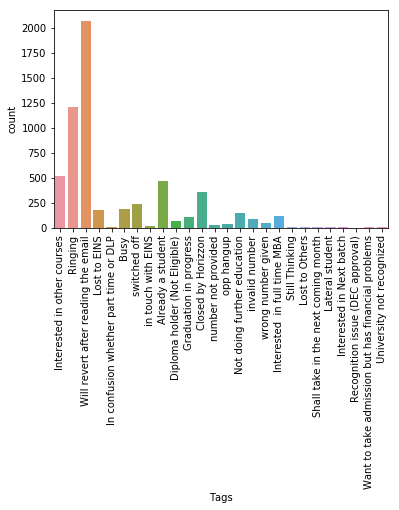

In [174]:
sns.countplot(data.Tags)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

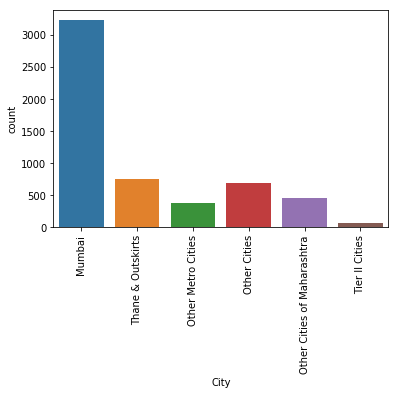

In [175]:
sns.countplot(data.City)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

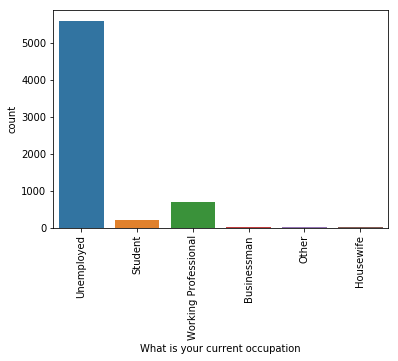

In [176]:
sns.countplot(data['What is your current occupation'])
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

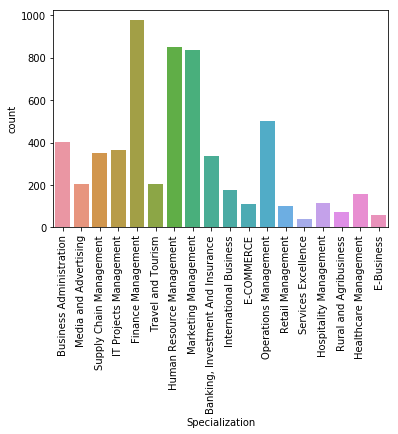

In [177]:
sns.countplot(data['Specialization'])
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

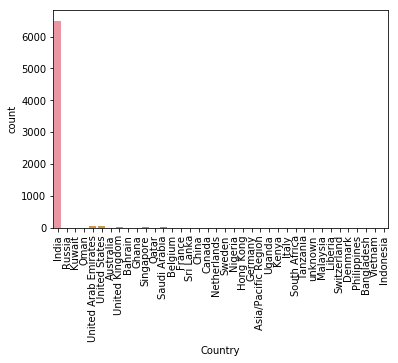

In [178]:
sns.countplot(data['Country'])
xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

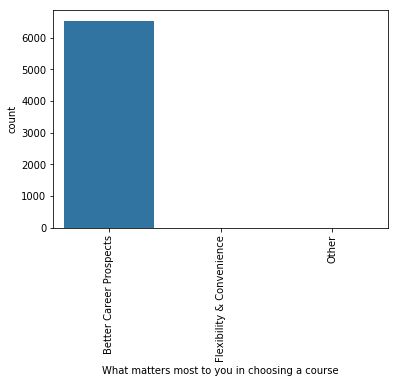

In [179]:
sns.countplot(data['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [180]:
data['City'] = data['City'].replace(np.nan, 'Mumbai')
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')
data['Tags'] = data['Tags'].replace(np.nan, 'Will revert after reading the email')
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')
data['Country'] = data['Country'].replace(np.nan, 'India')


In [181]:

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [182]:
data.dropna(inplace = True)
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [183]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [184]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


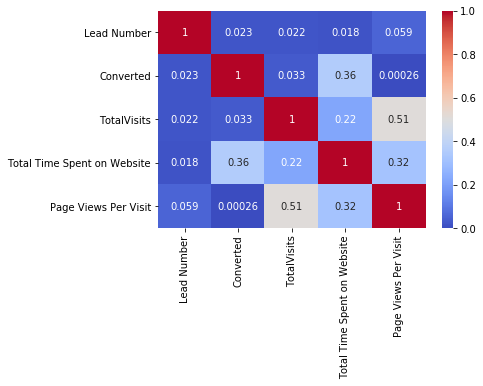

In [185]:
ax = sns.heatmap(data.corr(), annot=True,linecolor="black",cmap='coolwarm')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

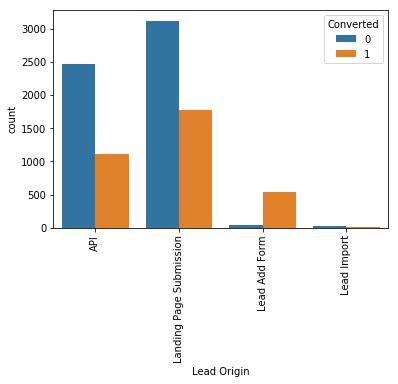

In [186]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

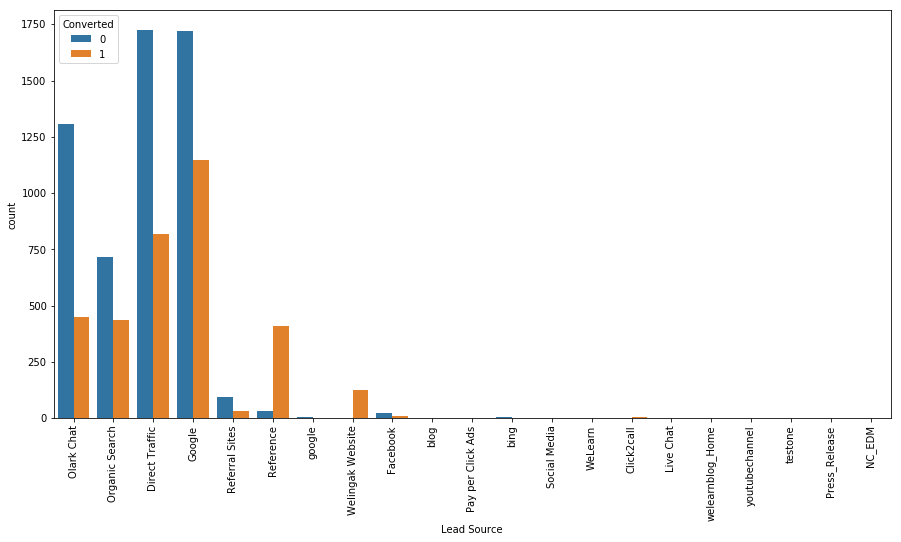

In [187]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

In [188]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

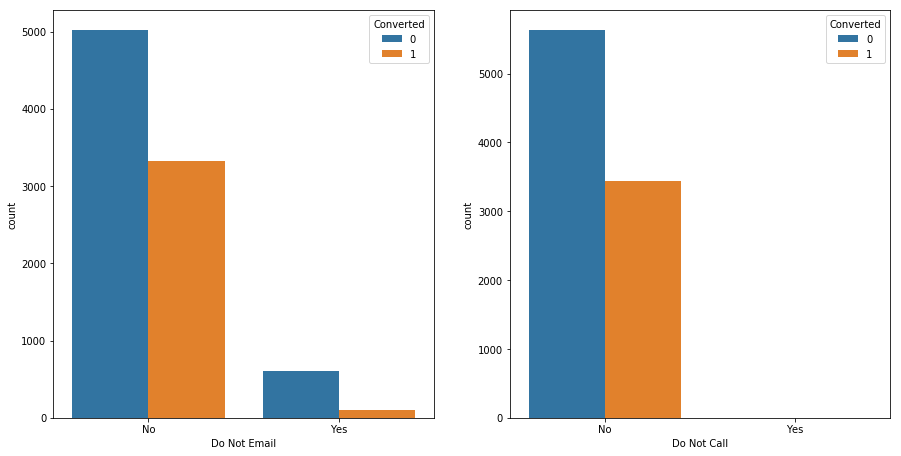

In [189]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

## treating numerical columns for outliers

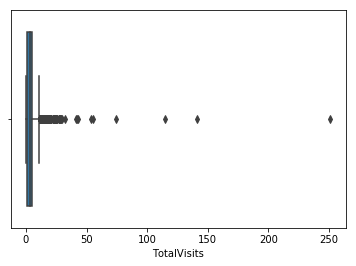

In [190]:
sns.boxplot(data['TotalVisits'])

In [191]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

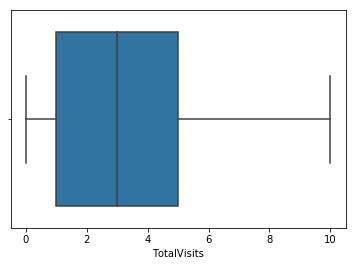

In [192]:
sns.boxplot(data['TotalVisits'])

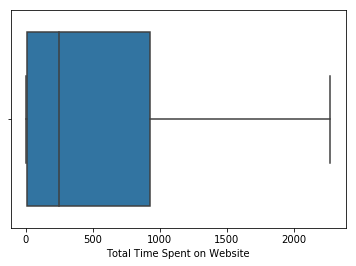

In [193]:
sns.boxplot(data['Total Time Spent on Website'])

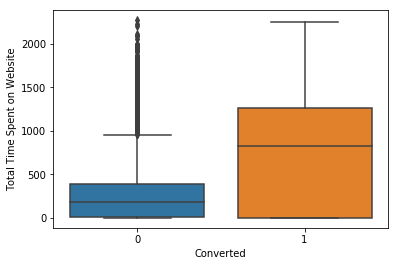

In [194]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

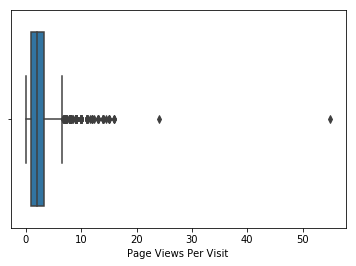

In [195]:
sns.boxplot(data['Page Views Per Visit'])

In [196]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

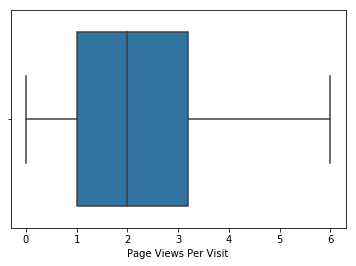

In [197]:
sns.boxplot(data['Page Views Per Visit'])

In [198]:
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

In [199]:
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [200]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [201]:
data.shape

(9074, 16)

In [202]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [203]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [204]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [205]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [206]:
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [207]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)

In [208]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [209]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [210]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.351000e+03,6.351000e+03,6.351000e+03
mean,4.153503e-17,2.774246e-16,3.950723e-17
std,1.000079e+00,1.000079e+00,1.000079e+00
min,-1.150329e+00,-8.886503e-01,-1.265540e+00
25%,-7.915538e-01,-8.703028e-01,-7.102788e-01
50%,-7.400339e-02,-4.354671e-01,-1.550176e-01
75%,6.435470e-01,8.002366e-01,5.834798e-01
max,2.437423e+00,3.195502e+00,2.066027e+00


In [212]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

### Model Building

In [213]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6261
Model Family:                Binomial   Df Model:                           89
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.0
Date:                Mon, 06 Jan 2020   Deviance:                       2499.9
Time:                        22:54:23   Pearson chi2:                 3.87e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.5889   2.15e+05      0.000      1.000   -4.21e+05    4.21e+05
Do Not Email                                            -1.3884      0.327     -4.244      0.000      -2.030      -0.747
Do Not Call                                             27.6949   9.99e+05   2.77e-05      1.000   -1.96e+06    1.96e+06
TotalVisits                                              0.1819      0.087      2.096      0.036       0.012       0.352
Total Time Spent on Website                              1.1453      0.064     17.904      0.000       1.020       1.271
Page Views Per Visit                                    -0.3270      0.099     -3.307      0.001      -0.521      -0.133
Lead Origin_Landing Page Submission                     -0.9762      0.221     -4.420      0.000      -1.409      -0.543
Lead Origin_Lead Add Form                               -0.4157      1.287     -0.323      0.747      -2.939       2.107
Lead Origin_Lead Import                                 28.7708   1.34e+05      0.000      1.000   -2.62e+05    2.62e+05
Lead Source_Facebook                                   -27.6731   1.34e+05     -0.000      1.000   -2.62e+05    2.62e+05
Lead Source_Google                                       0.2017      0.155      1.302      0.193      -0.102       0.505
Lead Source_Olark Chat                                   0.8634      0.234      3.694      0.000       0.405       1.321
Lead Source_Organic Search                               0.2264      0.210      1.076      0.282      -0.186       0.639
Lead Source_Others                                       0.7599      0.816      0.931      0.352      -0.840       2.359
Lead Source_Reference                                    1.7727      1.344      1.319      0.187      -0.861       4.407
Lead Source_Referral Sites                              -0.0978      0.492     -0.199      0.842      -1.061       0.866
Lead Source_Welingak Website                             5.4714      1.486      3.681      0.000       2.558       8.384
Last Activity_Converted to Lead                        -18.0133   5.33e+04     -0.000      1.000   -1.05e+05    1.04e+05
Last Activity_Email Bounced                            -18.5619   5.33e+04     -0.000      1.000   -1.05e+05    1.04e+05
Last Activity_Email Link Clicked                       -17.1708   5.33e+04     -0.000      1.000   -1.05e+05    1.04e+05
Last Activity_Email Marked Spam                          2.2013    4.9e+05   4.49e-06      1.000   -9.61e+05    9.61e+05
Last Activity_Email Opened                             -18.0140   5.33e+04     -0.000      1.000   -1.05e+05    1.04e+05
Last Activity_Email Received                             5.2244   3.75e+05   1.39e-05      1.000   -7.36e+05    7.36e+05
Last Activity_Fo

### Feature Selection Using RFE

In [214]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [215]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 30),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Others', False, 45),
 ('Lead Source_Reference', False, 70),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 29),
 ('Last Activity_Email Bounced', False, 23),
 ('Last Activity_Email Link Clicked', False, 54),
 ('Last Activity_Email Marked Spam', False, 47),
 ('Last Activity_Email Opened', False, 41),
 ('Last Activity_Email Received', False, 63),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Had a Phone Conversation

In [216]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [217]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1327.8
Date:                Mon, 06 Jan 2020   Deviance:                       2655.5
Time:                        22:54:26   Pearson chi2:                 2.49e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6945      0.241     -7.019      0.000      -2.168      -1.221
Do Not Email                                            -1.2264      0.243     -5.047      0.000      -1.703      -0.750
Total Time Spent on Website                              1.1552      0.061     18.869      0.000       1.035       1.275
Lead Origin_Lead Add Form                                2.3009      0.370      6.218      0.000       1.576       3.026
Lead Origin_Lead Import                                  1.7725      0.770      2.303      0.021       0.264       3.281
Lead Source_Olark Chat                                   1.1322      0.140      8.101      0.000       0.858       1.406
Lead Source_Welingak Website                             3.4235      0.831      4.120      0.000       1.795       5.052
What is your current occupation_Working Professional     1.2901      0.326      3.954      0.000       0.651       1.930
Tags_Busy                                                3.1633      0.341      9.277      0.000       2.495       3.832
Tags_Closed by Horizzon                                  7.9198      0.792      9.995      0.000       6.367       9.473
Tags_Lost to EINS                                        8.8025      0.768     11.462      0.000       7.297      10.308
Tags_Ringing                                            -2.0242      0.356     -5.694      0.000      -2.721      -1.327
Tags_Will revert after reading the email                 3.4936      0.242     14.429      0.000       3.019       3.968
Tags_invalid number                                    -23.7006   2.22e+04     -0.001      0.999   -4.35e+04    4.34e+04
Tags_switched off                                       -2.7649      0.635     -4.356      0.000      -4.009      -1.521
Tags_wrong number given                                -23.3363   3.01e+04     -0.001      0.999   -5.91e+04    5.91e+04
Lead Quality_Not Sure                                   -3.1401      0.141    -22.335      0.000      -3.416      -2.865
Lead Quality_Worst                                      -4.0228      0.838     -4.803      0.000      -5.664      -2.381
Last Notable Activity_Modified                          -0.9913      0.120     -8.260      0.000      -1.227      -0.756
Last Notable Activity_Olark Chat Conversation           -1.6347      0.408     -4.005      0.000      -2.435      -0.835
Last Notable Activity_SMS Sent                           2.2589      0.139     16.253      0.000       1.986       2.531
========================================================================================================================
"""

#### Checking VIFs

In [218]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Lead Quality_Not Sure,3.36
11,Tags_Will revert after reading the email,3.29
17,Last Notable Activity_Modified,1.86
2,Lead Origin_Lead Add Form,1.82
19,Last Notable Activity_SMS Sent,1.73
4,Lead Source_Olark Chat,1.64
10,Tags_Ringing,1.57
1,Total Time Spent on Website,1.43
5,Lead Source_Welingak Website,1.37
6,What is your current occupation_Working Profes...,1.27


In [219]:
col = col.drop('Tags_wrong number given',1)

In [220]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1331.1
Date:                Mon, 06 Jan 2020   Deviance:                       2662.2
Time:                        22:54:26   Pearson chi2:                 2.48e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8120      0.241     -7.523      0.000      -2.284      -1.340
Do Not Email                                            -1.2190      0.243     -5.025      0.000      -1.694      -0.744
Total Time Spent on Website                              1.1510      0.061     18.847      0.000       1.031       1.271
Lead Origin_Lead Add Form                                2.3167      0.372      6.235      0.000       1.588       3.045
Lead Origin_Lead Import                                  1.7057      0.749      2.278      0.023       0.238       3.173
Lead Source_Olark Chat                                   1.1305      0.140      8.097      0.000       0.857       1.404
Lead Source_Welingak Website                             3.4003      0.831      4.091      0.000       1.771       5.029
What is your current occupation_Working Professional     1.3151      0.328      4.004      0.000       0.671       1.959
Tags_Busy                                                3.2872      0.339      9.687      0.000       2.622       3.952
Tags_Closed by Horizzon                                  8.0244      0.792     10.127      0.000       6.471       9.577
Tags_Lost to EINS                                        8.9058      0.768     11.601      0.000       7.401      10.410
Tags_Ringing                                            -1.8946      0.353     -5.365      0.000      -2.587      -1.202
Tags_Will revert after reading the email                 3.6105      0.241     14.965      0.000       3.138       4.083
Tags_invalid number                                    -22.5678   1.35e+04     -0.002      0.999   -2.64e+04    2.64e+04
Tags_switched off                                       -2.6323      0.633     -4.159      0.000      -3.873      -1.392
Lead Quality_Not Sure                                   -3.1386      0.140    -22.354      0.000      -3.414      -2.863
Lead Quality_Worst                                      -3.9391      0.846     -4.654      0.000      -5.598      -2.280
Last Notable Activity_Modified                          -0.9863      0.120     -8.220      0.000      -1.222      -0.751
Last Notable Activity_Olark Chat Conversation           -1.6326      0.408     -4.004      0.000      -2.432      -0.833
Last Notable Activity_SMS Sent                           2.2451      0.138     16.243      0.000       1.974       2.516
========================================================================================================================
"""

In [221]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Lead Quality_Not Sure,3.33
11,Tags_Will revert after reading the email,3.26
16,Last Notable Activity_Modified,1.86
2,Lead Origin_Lead Add Form,1.82
18,Last Notable Activity_SMS Sent,1.72
4,Lead Source_Olark Chat,1.64
10,Tags_Ringing,1.56
1,Total Time Spent on Website,1.43
5,Lead Source_Welingak Website,1.37
6,What is your current occupation_Working Profes...,1.27


In [222]:
col = col.drop('Tags_invalid number',1)

In [223]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1335.7
Date:                Mon, 06 Jan 2020   Deviance:                       2671.5
Time:                        22:54:27   Pearson chi2:                 2.44e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9502      0.241     -8.104      0.000      -2.422      -1.479
Do Not Email                                            -1.2091      0.242     -4.994      0.000      -1.684      -0.735
Total Time Spent on Website                              1.1529      0.061     18.911      0.000       1.033       1.272
Lead Origin_Lead Add Form                                2.3477      0.373      6.296      0.000       1.617       3.079
Lead Origin_Lead Import                                  1.7144      0.750      2.287      0.022       0.245       3.184
Lead Source_Olark Chat                                   1.1338      0.139      8.136      0.000       0.861       1.407
Lead Source_Welingak Website                             3.3660      0.831      4.049      0.000       1.737       4.995
What is your current occupation_Working Professional     1.3482      0.331      4.076      0.000       0.700       1.997
Tags_Busy                                                3.4300      0.338     10.137      0.000       2.767       4.093
Tags_Closed by Horizzon                                  8.1437      0.793     10.272      0.000       6.590       9.698
Tags_Lost to EINS                                        9.0244      0.768     11.753      0.000       7.520      10.529
Tags_Ringing                                            -1.7371      0.351     -4.950      0.000      -2.425      -1.049
Tags_Will revert after reading the email                 3.7413      0.242     15.490      0.000       3.268       4.215
Tags_switched off                                       -2.4682      0.632     -3.908      0.000      -3.706      -1.230
Lead Quality_Not Sure                                   -3.1266      0.140    -22.326      0.000      -3.401      -2.852
Lead Quality_Worst                                      -3.8773      0.852     -4.552      0.000      -5.547      -2.208
Last Notable Activity_Modified                          -0.9840      0.120     -8.198      0.000      -1.219      -0.749
Last Notable Activity_Olark Chat Conversation           -1.6385      0.408     -4.019      0.000      -2.438      -0.840
Last Notable Activity_SMS Sent                           2.2136      0.137     16.149      0.000       1.945       2.482
========================================================================================================================
"""

In [224]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Quality_Not Sure,3.27
11,Tags_Will revert after reading the email,3.20
15,Last Notable Activity_Modified,1.86
2,Lead Origin_Lead Add Form,1.82
17,Last Notable Activity_SMS Sent,1.70
4,Lead Source_Olark Chat,1.64
10,Tags_Ringing,1.55
1,Total Time Spent on Website,1.43
5,Lead Source_Welingak Website,1.37
6,What is your current occupation_Working Profes...,1.27


In [225]:
col = col.drop('Lead Origin_Lead Import',1)

In [226]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.4
Date:                Mon, 06 Jan 2020   Deviance:                       2676.7
Time:                        22:54:27   Pearson chi2:                 2.45e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9281      0.240     -8.026      0.000      -2.399      -1.457
Do Not Email                                            -1.2150      0.242     -5.023      0.000      -1.689      -0.741
Total Time Spent on Website                              1.1396      0.061     18.825      0.000       1.021       1.258
Lead Origin_Lead Add Form                                2.3158      0.373      6.210      0.000       1.585       3.047
Lead Source_Olark Chat                                   1.1076      0.139      7.994      0.000       0.836       1.379
Lead Source_Welingak Website                             3.3728      0.832      4.056      0.000       1.743       5.003
What is your current occupation_Working Professional     1.3490      0.330      4.092      0.000       0.703       1.995
Tags_Busy                                                3.4304      0.338     10.143      0.000       2.767       4.093
Tags_Closed by Horizzon                                  8.1389      0.792     10.271      0.000       6.586       9.692
Tags_Lost to EINS                                        9.0217      0.768     11.753      0.000       7.517      10.526
Tags_Ringing                                            -1.7340      0.351     -4.940      0.000      -2.422      -1.046
Tags_Will revert after reading the email                 3.7499      0.242     15.518      0.000       3.276       4.224
Tags_switched off                                       -2.4696      0.630     -3.918      0.000      -3.705      -1.234
Lead Quality_Not Sure                                   -3.1388      0.140    -22.408      0.000      -3.413      -2.864
Lead Quality_Worst                                      -3.8807      0.851     -4.558      0.000      -5.549      -2.212
Last Notable Activity_Modified                          -0.9892      0.120     -8.252      0.000      -1.224      -0.754
Last Notable Activity_Olark Chat Conversation           -1.6368      0.407     -4.024      0.000      -2.434      -0.840
Last Notable Activity_SMS Sent                           2.2054      0.137     16.112      0.000       1.937       2.474
========================================================================================================================
"""

In [227]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Quality_Not Sure,3.27
10,Tags_Will revert after reading the email,3.19
14,Last Notable Activity_Modified,1.86
2,Lead Origin_Lead Add Form,1.81
16,Last Notable Activity_SMS Sent,1.70
3,Lead Source_Olark Chat,1.64
9,Tags_Ringing,1.54
1,Total Time Spent on Website,1.42
4,Lead Source_Welingak Website,1.37
5,What is your current occupation_Working Profes...,1.27


In [228]:
col = col.drop('Lead Quality_Not Sure',1)

In [229]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1691.2
Date:                Mon, 06 Jan 2020   Deviance:                       3382.5
Time:                        22:54:27   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6679      0.217    -16.897      0.000      -4.093      -3.242
Do Not Email                                            -1.4612      0.209     -6.978      0.000      -1.872      -1.051
Total Time Spent on Website                              1.2078      0.054     22.375      0.000       1.102       1.314
Lead Origin_Lead Add Form                                3.6297      0.300     12.094      0.000       3.041       4.218
Lead Source_Olark Chat                                   0.7077      0.121      5.825      0.000       0.470       0.946
Lead Source_Welingak Website                             1.4659      0.802      1.827      0.068      -0.107       3.039
What is your current occupation_Working Professional     2.8346      0.262     10.821      0.000       2.321       3.348
Tags_Busy                                                2.4990      0.315      7.933      0.000       1.882       3.116
Tags_Closed by Horizzon                                  8.1279      0.754     10.775      0.000       6.649       9.606
Tags_Lost to EINS                                        8.1432      0.769     10.584      0.000       6.635       9.651
Tags_Ringing                                            -2.0402      0.327     -6.248      0.000      -2.680      -1.400
Tags_Will revert after reading the email                 3.2030      0.213     15.066      0.000       2.786       3.620
Tags_switched off                                       -1.5283      0.575     -2.660      0.008      -2.654      -0.402
Lead Quality_Worst                                      -2.1334      0.782     -2.728      0.006      -3.666      -0.600
Last Notable Activity_Modified                          -1.0743      0.103    -10.414      0.000      -1.276      -0.872
Last Notable Activity_Olark Chat Conversation           -1.8846      0.366     -5.150      0.000      -2.602      -1.167
Last Notable Activity_SMS Sent                           2.2526      0.125     18.070      0.000       2.008       2.497
========================================================================================================================
"""

In [230]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,2.23
2,Lead Origin_Lead Add Form,1.77
15,Last Notable Activity_SMS Sent,1.70
13,Last Notable Activity_Modified,1.69
3,Lead Source_Olark Chat,1.62
1,Total Time Spent on Website,1.39
4,Lead Source_Welingak Website,1.34
5,What is your current occupation_Working Profes...,1.21
7,Tags_Closed by Horizzon,1.21
9,Tags_Ringing,1.16


In [231]:
col = col.drop('Lead Source_Welingak Website',1)

In [232]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1693.4
Date:                Mon, 06 Jan 2020   Deviance:                       3386.8
Time:                        22:54:28   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6854      0.218    -16.906      0.000      -4.113      -3.258
Do Not Email                                            -1.4379      0.207     -6.939      0.000      -1.844      -1.032
Total Time Spent on Website                              1.2092      0.054     22.384      0.000       1.103       1.315
Lead Origin_Lead Add Form                                3.9275      0.274     14.327      0.000       3.390       4.465
Lead Source_Olark Chat                                   0.7073      0.121      5.822      0.000       0.469       0.945
What is your current occupation_Working Professional     2.8188      0.263     10.738      0.000       2.304       3.333
Tags_Busy                                                2.5154      0.316      7.968      0.000       1.897       3.134
Tags_Closed by Horizzon                                  8.1344      0.755     10.776      0.000       6.655       9.614
Tags_Lost to EINS                                        8.1562      0.769     10.601      0.000       6.648       9.664
Tags_Ringing                                            -2.0679      0.329     -6.294      0.000      -2.712      -1.424
Tags_Will revert after reading the email                 3.2214      0.214     15.083      0.000       2.803       3.640
Tags_switched off                                       -1.5130      0.575     -2.632      0.008      -2.640      -0.386
Lead Quality_Worst                                      -2.1224      0.786     -2.701      0.007      -3.662      -0.583
Last Notable Activity_Modified                          -1.0708      0.103    -10.397      0.000      -1.273      -0.869
Last Notable Activity_Olark Chat Conversation           -1.8859      0.366     -5.153      0.000      -2.603      -1.169
Last Notable Activity_SMS Sent                           2.2518      0.125     18.064      0.000       2.007       2.496
========================================================================================================================
"""

In [233]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,2.22
14,Last Notable Activity_SMS Sent,1.70
12,Last Notable Activity_Modified,1.69
3,Lead Source_Olark Chat,1.62
2,Lead Origin_Lead Add Form,1.41
1,Total Time Spent on Website,1.39
6,Tags_Closed by Horizzon,1.21
4,What is your current occupation_Working Profes...,1.18
8,Tags_Ringing,1.16
0,Do Not Email,1.12


In [234]:
col = col.drop('Tags_switched off',1)

In [235]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1697.9
Date:                Mon, 06 Jan 2020   Deviance:                       3395.8
Time:                        22:54:28   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9799      0.207    -19.253      0.000      -4.385      -3.575
Do Not Email                                            -1.4498      0.207     -7.016      0.000      -1.855      -1.045
Total Time Spent on Website                              1.2113      0.054     22.437      0.000       1.106       1.317
Lead Origin_Lead Add Form                                3.9589      0.275     14.374      0.000       3.419       4.499
Lead Source_Olark Chat                                   0.7125      0.121      5.876      0.000       0.475       0.950
What is your current occupation_Working Professional     2.8680      0.267     10.743      0.000       2.345       3.391
Tags_Busy                                                2.8328      0.304      9.323      0.000       2.237       3.428
Tags_Closed by Horizzon                                  8.4225      0.752     11.198      0.000       6.948       9.897
Tags_Lost to EINS                                        8.4035      0.763     11.015      0.000       6.908       9.899
Tags_Ringing                                            -1.7436      0.316     -5.519      0.000      -2.363      -1.124
Tags_Will revert after reading the email                 3.5193      0.201     17.503      0.000       3.125       3.913
Lead Quality_Worst                                      -1.8905      0.808     -2.340      0.019      -3.474      -0.307
Last Notable Activity_Modified                          -1.0675      0.103    -10.337      0.000      -1.270      -0.865
Last Notable Activity_Olark Chat Conversation           -1.8920      0.366     -5.167      0.000      -2.610      -1.174
Last Notable Activity_SMS Sent                           2.2066      0.123     17.993      0.000       1.966       2.447
========================================================================================================================
"""

In [236]:
col = col.drop('Lead Quality_Worst',1)

In [237]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1702.0
Date:                Mon, 06 Jan 2020   Deviance:                       3404.1
Time:                        22:54:28   Pearson chi2:                 1.07e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1830      0.200    -20.967      0.000      -4.574      -3.792
Do Not Email                                            -1.4496      0.207     -7.012      0.000      -1.855      -1.044
Total Time Spent on Website                              1.2082      0.054     22.461      0.000       1.103       1.314
Lead Origin_Lead Add Form                                3.9738      0.276     14.379      0.000       3.432       4.515
Lead Source_Olark Chat                                   0.7069      0.121      5.838      0.000       0.470       0.944
What is your current occupation_Working Professional     2.8533      0.265     10.780      0.000       2.335       3.372
Tags_Busy                                                3.0203      0.301     10.047      0.000       2.431       3.610
Tags_Closed by Horizzon                                  8.6131      0.751     11.473      0.000       7.142      10.085
Tags_Lost to EINS                                        8.4245      0.752     11.204      0.000       6.951       9.898
Tags_Ringing                                            -1.5640      0.313     -4.994      0.000      -2.178      -0.950
Tags_Will revert after reading the email                 3.7167      0.194     19.122      0.000       3.336       4.098
Last Notable Activity_Modified                          -1.0592      0.103    -10.281      0.000      -1.261      -0.857
Last Notable Activity_Olark Chat Conversation           -1.8826      0.366     -5.148      0.000      -2.599      -1.166
Last Notable Activity_SMS Sent                           2.2351      0.123     18.182      0.000       1.994       2.476
========================================================================================================================
"""

In [238]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,2.12
12,Last Notable Activity_SMS Sent,1.62
3,Lead Source_Olark Chat,1.61
10,Last Notable Activity_Modified,1.56
2,Lead Origin_Lead Add Form,1.41
1,Total Time Spent on Website,1.39
6,Tags_Closed by Horizzon,1.20
4,What is your current occupation_Working Profes...,1.18
8,Tags_Ringing,1.15
0,Do Not Email,1.11


In [239]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.340740
1012    0.570730
9226    0.000766
4750    0.977118
7987    0.996389
1281    0.946667
2880    0.177817
4971    0.966840
7536    0.945050
1248    0.010341
dtype: float64

In [240]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.40740499e-01, 5.70729961e-01, 7.66403053e-04, 9.77118108e-01,
       9.96388719e-01, 9.46667214e-01, 1.77816590e-01, 9.66840216e-01,
       9.45050029e-01, 1.03405348e-02])

In [241]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.340740,3009
1,0,0.570730,1012
2,0,0.000766,9226
3,1,0.977118,4750
4,1,0.996389,7987


In [242]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.340740,3009,0
1,0,0.570730,1012,1
2,0,0.000766,9226,0
3,1,0.977118,4750,1
4,1,0.996389,7987,1


In [243]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3656  249]
 [ 397 2049]]


In [244]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8982837348449063


## Metrics beyond simply accuracy

In [245]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [246]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8376941946034342

In [247]:
# Let us calculate specificity
TN / float(TN+FP)

0.9362355953905249

In [248]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06376440460947504


In [249]:
# positive predictive value 
print (TP / float(TP+FP))

0.891644908616188


In [250]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9020478657784358


###  Plotting the ROC Curve

In [251]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

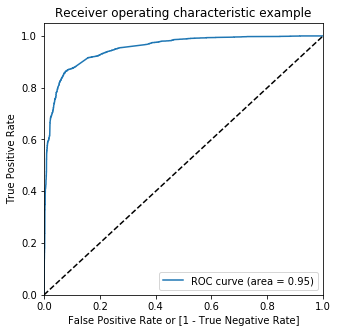

In [252]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [253]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.340740,3009,0,1,1,1,1,0,0,0,0,0,0
1,0,0.570730,1012,1,1,1,1,1,1,1,0,0,0,0
2,0,0.000766,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.977118,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.996389,7987,1,1,1,1,1,1,1,1,1,1,1


In [254]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.745867  0.975061  0.602305
0.2   0.2  0.837821  0.938675  0.774648
0.3   0.3  0.871359  0.914554  0.844302
0.4   0.4  0.900016  0.863859  0.922663
0.5   0.5  0.898284  0.837694  0.936236
0.6   0.6  0.893875  0.804988  0.949552
0.7   0.7  0.881121  0.752249  0.961844
0.8   0.8  0.857975  0.665576  0.978489
0.9   0.9  0.819713  0.546607  0.990781


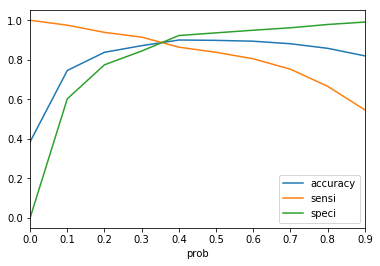

In [255]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [256]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.340740,3009,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.570730,1012,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.000766,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.977118,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.996389,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [257]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.340740,3009,0,1,1,1,1,0,0,0,0,0,0,0,34
1,0,0.570730,1012,1,1,1,1,1,1,1,0,0,0,0,1,57
2,0,0.000766,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.977118,4750,1,1,1,1,1,1,1,1,1,1,1,1,98
4,1,0.996389,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [258]:
# Overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [259]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8716271463614064

In [260]:
#  calculating specificity
TN / float(TN+FP)

0.9060179257362356

In [261]:
# Calculating false postive rate 
print(FP/ float(TN+FP))

0.0939820742637644


In [262]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8531412565026011


In [263]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9184839044652129


Precision and recall

In [264]:
#Taking the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3656,  249],
       [ 397, 2049]], dtype=int64)

In [265]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.891644908616188

In [266]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8376941946034342

In [267]:
from sklearn.metrics import precision_score, recall_score

In [268]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.891644908616188

In [269]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8376941946034342

Precision and recall tradeoff

In [270]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       1
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      1
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [271]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

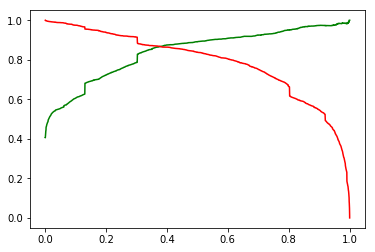

In [272]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Predictions on the test set

In [273]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [274]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
3271,0,-0.591008,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.894051,0,0,1,0,0,0,0,1,0,0,0
7936,0,-0.743117,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.878732,1,0,0,0,1,0,0,0,1,0,0
3830,0,-0.578179,0,0,0,0,0,0,0,1,0,0,0


In [275]:
X_test_sm = sm.add_constant(X_test)
# Predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [276]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.234971
1490,0.990764
7936,0.203552
4216,0.998136
3830,0.237769


In [277]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Making CustID to index
y_test_df['Prospect ID'] = y_test_df.index
# Removing index for both dataframes to append 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.234971
1,1,1490,0.990764
2,0,7936,0.203552
3,1,4216,0.998136
4,0,3830,0.237769


In [278]:
# Renaming 0 as Conveted_Prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.234971
1,1490,1,0.990764
2,7936,0,0.203552
3,4216,1,0.998136
4,3830,0,0.237769


In [279]:
# Calculating final_predicted
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
# Calculating Lead Score
y_pred_final['Lead Score']= round(y_pred_final['Converted_prob'],2)*100
y_pred_final.head(5)

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score
0,3271,0,0.234971,0,23.0
1,1490,1,0.990764,1,99.0
2,7936,0,0.203552,0,20.0
3,4216,1,0.998136,1,100.0
4,3830,0,0.237769,0,24.0


Metrics calculation of the final model

In [280]:
# overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8846860080793243

In [281]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_final

array([[1561,  173],
       [ 141,  848]], dtype=int64)

In [282]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [283]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8574317492416582

In [284]:
#calculating specificity
TN / float(TN+FP)

0.9002306805074971